## Visual icesat1 data on the selected region.

In [24]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [25]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [26]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'


In [27]:
### Read one-year/full-region icesat/glas14 data
with h5py.File('data/icesat/glah14-readout/2009/tiles_all/GLAH14_2009_subs.H5','r') as f_glas14:
    lat_glas14 = f_glas14['h_lat'][:]
    lon_glas14 = f_glas14['h_lon'][:]
    h_glas14 = f_glas14['h_cor'][:]
    t_glas14 = f_glas14['t_dyr'][:]
    print(f_glas14.keys())


<KeysViewHDF5 ['h_cor', 'h_lat', 'h_lon', 'h_orbit', 'h_track', 't_dyr']>


In [28]:
### Read one-year/one-tile icesat/glas14 data
with h5py.File('data/icesat/glah14-readout/2009/tile-27-91/GLAH14_2009.H5','r') as f_glas14_tile:
    lat_glas14_tile = f_glas14_tile['h_lat'][:]
    lon_glas14_tile = f_glas14_tile['h_lon'][:]
    h_glas14_tile = f_glas14_tile['h_cor'][:]
    t_glas14_tile = f_glas14_tile['t_dyr'][:]
    print(f_glas14_tile.keys())



<KeysViewHDF5 ['h_cor', 'h_lat', 'h_lon', 'h_orbit', 'h_track', 't_dyr']>


### 1. Global view(HMA region/one-year)

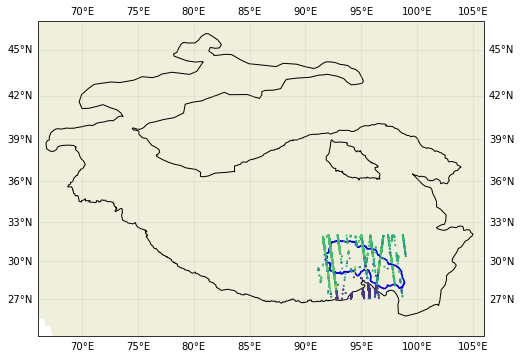

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([66, 106, 24.0, 45.0])
ax.add_feature(cfeature.LAND); 
# ax.add_feature(cfeature.LAKES); ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-1 data
ax.scatter(x=lon_glas14, y=lat_glas14, c=h_glas14, s=1, transform=ccrs.PlateCarree(), zorder=0)



### 2. Local view (setp region/one-year)

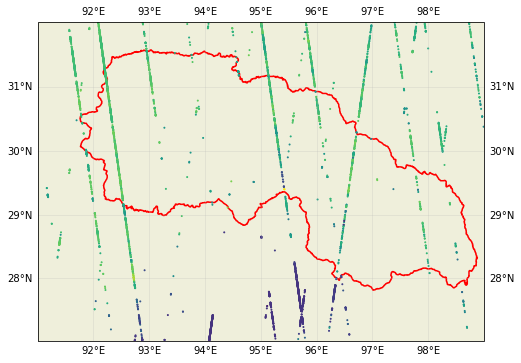

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-1 data
ax.scatter(x=lon_glas14, y=lat_glas14, c=h_glas14, s=1, transform=ccrs.PlateCarree(), zorder=0)



### 2. Local view (one-tile/one-year)

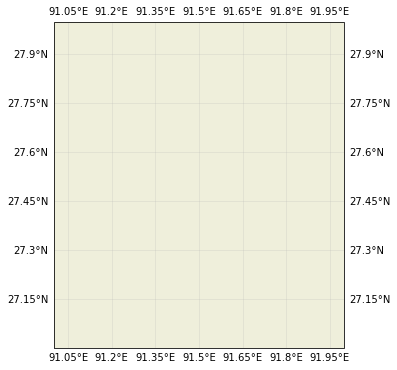

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 92, 27, 28])  ## 1 tile check
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. icesat-1 data
ax.scatter(x=lon_glas14_tile, y=lat_glas14_tile, c=h_glas14_tile, s=1, transform=ccrs.PlateCarree(), zorder=0)

